In [3]:
import os
os.getcwd()
os.chdir('')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# It was reported that ‘the Canterbury earthquakes of 2010 and 2011 have had a major economic and fiscal 
# impact on the region itself and on New Zealand as a whole, and the earthquakes rank as one of the most 
# costly natural disasters for insurers worldwide, since 1950’. 

# The questions can be addressed 'how does the earthquake affect domestic economy' and 'whether there was 
# a significant decline in population at region of Canterbury'? 
# The following analysis will be based on a comparison between the Canterbury and Wellington to explore the questions.

# the first dataset about demostic gross product
df1a = pd.read_excel('grossproduct.xlsx',skiprows=5,skipfooter=(9), header=None).T
df1a = df1a[[0,10,16]]
df1a = df1a.drop([0, 1])
df1a.columns = ['year','gross_wellington','gross_canterbury']
df1a['year'] = df1a['year'].replace({'2007R':'2007','2008R':'2008','2009R':'2009','2010R':'2010','2011R':'2011','2012R':'2012','2013R':'2013','2015P':'2015','2016P':'2016'})

# count the differences of gross product based on the previous year
df1b = df1a.set_index('year').diff()
df1b = df1b.reset_index()
df1b.columns = ['year','grosdiff_wellington','grosdiff_canterbury']
# merge the two datasets 
df1 = pd.merge(df1a,df1b,on='year')
df1.dropna(inplace=True)
df1

# Extracting the three specific columns (year, gross product in Wellington and gross product in Canterbury) in the 
# economic dataset, counting the differences based on the previous year, we could see that there was a significant 
# declining trend in gross product at Canterbury, which decreased to the lowest point (608) at the year of 2010. 
# The gross product was continuously and unstable rising in Wellington, which was less affected by the earthquakes. 

,year,gross_wellington,gross_canterbury,grosdiff_wellington,grosdiff_canterbury
1,2001,17447,13794,224,665
2,2002,18698,14800,1251,1006
3,2003,19573,15794,875,994
4,2004,20478,17064,905,1270
5,2005,21505,18671,1027,1607
6,2006,22846,19697,1341,1026
7,2007,23578,20941,732,1244
8,2008,25359,22580,1781,1639
9,2009,26098,23288,739,708
10,2010,27258,23896,1160,608


In [5]:
# the first dataset about population
df2a = pd.read_excel('population.xlsx',skiprows=4,skipfooter=(4), header=None).T
df2a = df2a[[0,10,16]]
df2a = df2a.drop([0])
df2a.columns = ['year','population_wellington','population_canterbury']

# count the population differences based on the previous year
df2b = df2a.set_index('year').diff()
df2b = df2b.reset_index()
df2b.columns = ['year','popdiff_wellington','popdiff_canterbury']
df2 = pd.merge(df2a,df2b,on='year')
df2.dropna(inplace=True)
df2

# The population was dramatically decreasing in Canterbury at the year of 2011 and 2012 (e.g., reducing nearly 6100 
# in population at 2012 compared with the previous year); however, that has not happened at Wellington. 

,year,population_wellington,population_canterbury,popdiff_wellington,popdiff_canterbury
1,2001,439100,496200,2200,2700
2,2002,443100,501700,4000,5500
3,2003,449200,511200,6100,9500
4,2004,455400,521200,6200,10000
5,2005,460000,529400,4600,8200
6,2006,464100,536900,4100,7500
7,2007,468100,544800,4000,7900
8,2008,470800,551500,2700,6700
9,2009,473700,557800,2900,6300
10,2010,477900,565300,4200,7500


(array([2000., 2002., 2004., 2006., 2008., 2010., 2012., 2014., 2016.,
        2018.]), <a list of 10 Text xticklabel objects>)

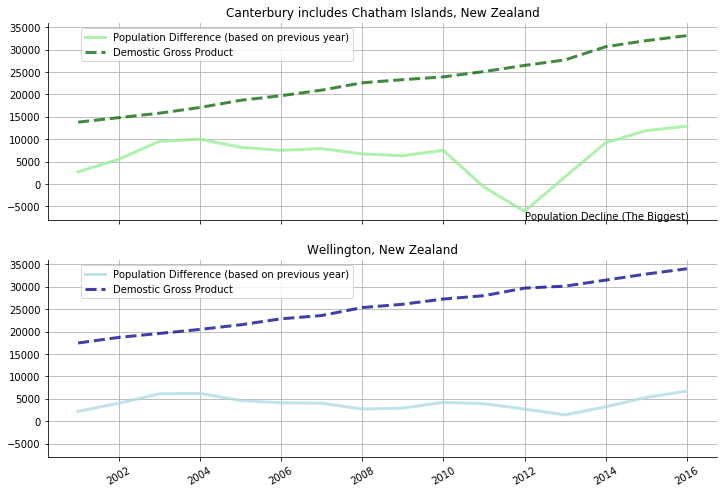

In [6]:
%matplotlib inline

plt.figure()
fig = plt.figure(figsize=(12,8));
ax1 = plt.subplot(211)
ax1.grid(True)
ax1.set_xticklabels([])
year = df1['year']

plt.plot(year,df2['popdiff_canterbury'],'k', label='Population Difference (based on previous year)',color='lightgreen',linewidth=3,alpha=0.75)
plt.plot(year,df1['gross_canterbury'],'k--',label='Demostic Gross Product',color='darkgreen',linewidth=3,alpha=0.75)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(bbox_to_anchor=(0.05, 0.87, 1., .102), loc=2,borderaxespad=0., fontsize='medium')
plt.title('Canterbury includes Chatham Islands, New Zealand')
plt.annotate('Population Decline (The Biggest)', xy=(2012,-8000), fontsize='medium')

ax2 = plt.subplot(212, sharey=ax1)
ax2.grid(True)
plt.plot(year,df2['popdiff_wellington'],'k', label='Population Difference (based on previous year)',color='lightblue',linewidth=3,alpha=0.75)
plt.plot(year,df1['gross_wellington'],'k--',label='Demostic Gross Product',color='darkblue',linewidth=3,alpha=0.75)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(bbox_to_anchor=(0.05, 0.87, 1., .102), loc=2,borderaxespad=0., fontsize='medium')
plt.title('Wellington, New Zealand')
plt.xticks(rotation = 30)